In [1]:
# only for cuda enabled laptop and desktop
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

2022-07-13 11:05:40.712576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2022-07-13 11:05:43.887147: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-13 11:05:43.898131: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-07-13 11:05:43.950699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-13 11:05:43.951185: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce 940M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 13.41GiB/s
2022-07-13 11:05:43.951215: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-07-13 11:05:44.005253: I tensorflow/stream_executor/platform/default/

In [2]:
import os #operating system make available os function
import zipfile # zip and unzip

local_zip = '/home/subhash/cell_images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
# Directory with our training horse pictures
import os
train_Parasitized_dir = os.path.join('cell_images/Parasitized')

# Directory with our training human pictures
train_Uninfected_dir = os.path.join('cell_images/Uninfected')

In [4]:
train_Parasitized_names = os.listdir(train_Parasitized_dir)
print(train_Parasitized_names[:10])

train_Uninfected_names = os.listdir(train_Uninfected_dir)
print(train_Uninfected_names[:10])

['C91P52ThinF_IMG_20150821_123314_cell_198.png', 'C48P9thinF_IMG_20150721_164304_cell_22.png', 'C180P141NThinF_IMG_20151201_163702_cell_192.png', 'C99P60ThinF_IMG_20150918_141314_cell_111.png', 'C118P79ThinF_IMG_20151002_110942_cell_18.png', 'C76P37ThinF_IMG_20150815_171454_cell_253.png', 'C145P106ThinF_IMG_20151016_154844_cell_155.png', 'C129P90ThinF_IMG_20151004_134636_cell_8.png', 'C137P98ThinF_IMG_20151005_162437_cell_80.png', 'C147P108ThinF_IMG_20151115_101317_cell_193.png']
['C215ThinF_IMG_20151106_133643_cell_22.png', 'C224ThinF_IMG_20151112_112334_cell_4.png', 'C113P74ThinF_IMG_20150930_134614_cell_138.png', 'C123P84ThinF_IMG_20151002_152144_cell_49.png', 'C2NThinF_IMG_20150604_114815_cell_217.png', 'C183P144NThinF_IMG_20151201_224107_cell_42.png', 'C155P116ThinF_IMG_20151115_143330_cell_26.png', 'C2NThinF_IMG_20150604_114815_cell_62.png', 'C229ThinF_IMG_20151112_144222_cell_207.png', 'C176P137NThinF_IMG_20151201_114035_cell_110.png']


In [5]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

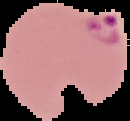

In [6]:
image_1 = load_img('cell_images/Parasitized/C133P94ThinF_IMG_20151004_155518_cell_113.png')
image_1

In [7]:
import matplotlib.image as mpimg
import numpy as np
imd = mpimg.imread('cell_images/Parasitized/C133P94ThinF_IMG_20151004_155518_cell_113.png')
imd.shape

(121, 130, 3)

In [8]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Sequential
import matplotlib.pyplot as plt
from glob import glob

In [9]:
folder_count = len(glob('cell_images/*'))
print(folder_count)

2


In [10]:
IMG_HIEGHT = 100
IMG_WIDHT = 100

In [11]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=25,
                                     zoom_range=0.1,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.2,
                                     horizontal_flip=True,
                                    validation_split=0.2,)

In [12]:
train_data_gen = image_gen_train.flow_from_directory(directory='cell_images',
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    subset='training',
                                                    class_mode='binary')

Found 22048 images belonging to 2 classes.


In [13]:
train_data_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [14]:
image_gen_val = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)
val_data_gen = image_gen_val.flow_from_directory(directory='cell_images',
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                subset='validation',
                                                class_mode='binary')

Found 5510 images belonging to 2 classes.


In [15]:
import time

In [16]:
sample_data, label = next(train_data_gen)

In [17]:
sample_data.shape

(32, 100, 100, 3)

In [18]:
label

array([0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.],
      dtype=float32)

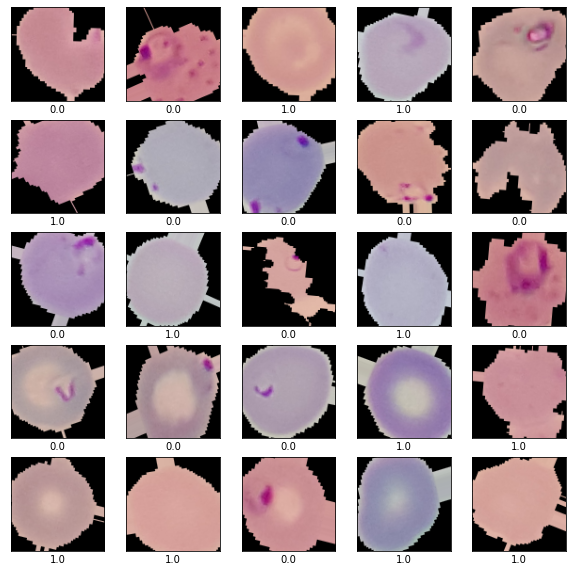

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_data[i], cmap=plt.cm.binary)
    plt.xlabel(label[i])
plt.show()

In [20]:

from keras import layers
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (100, 100, 3),include_top = False, weights = 'imagenet')

2022-07-13 11:05:56.318728: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-13 11:05:56.319004: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-13 11:05:56.319237: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-13 11:05:56.319586: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:0a:00.0 name: NVIDIA GeForce 940M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 3 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 13.41GiB/s
2

In [21]:
for layer in base_model.layers:
    layer.trainable = False

In [22]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

vgg_model = tf.keras.models.Model(base_model.input, x)

In [23]:
vgg_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [24]:
vgg_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [25]:
tf.keras.utils.plot_model(vgg_model,show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [26]:
t1 = time.time()
history = vgg_model.fit_generator(train_data_gen, epochs=6, validation_data=val_data_gen)
t2 = time.time()

/home/subhash/miniconda3/envs/deepl/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-07-13 11:06:01.863080: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-13 11:06:01.877297: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2194915000 Hz


Epoch 1/6


2022-07-13 11:06:03.345916: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-07-13 11:06:03.871995: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2022-07-13 11:06:05.377214: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2022-07-13 11:06:05.408026: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-07-13 11:06:06.388863: W tensorflow/core/common_runtime/bfc_allocator.cc:314] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the av

689/689 [==============================] - 285s 396ms/step - loss: 0.3372 - accuracy: 0.8534 - val_loss: 0.2446 - val_accuracy: 0.8984
Epoch 2/6
689/689 [==============================] - 267s 387ms/step - loss: 0.2205 - accuracy: 0.9162 - val_loss: 0.2268 - val_accuracy: 0.9114
Epoch 3/6
689/689 [==============================] - 271s 393ms/step - loss: 0.2087 - accuracy: 0.9211 - val_loss: 0.2368 - val_accuracy: 0.9091
Epoch 4/6
689/689 [==============================] - 277s 401ms/step - loss: 0.1913 - accuracy: 0.9300 - val_loss: 0.2417 - val_accuracy: 0.9143
Epoch 5/6
689/689 [==============================] - 281s 408ms/step - loss: 0.2116 - accuracy: 0.9264 - val_loss: 0.2507 - val_accuracy: 0.9143
Epoch 6/6
689/689 [==============================] - 287s 417ms/step - loss: 0.2004 - accuracy: 0.9260 - val_loss: 0.2583 - val_accuracy: 0.9149


In [27]:
print('Time to train model:',round((t2-t1)/60, 2), 'minuts')

Time to train model: 27.8 minuts


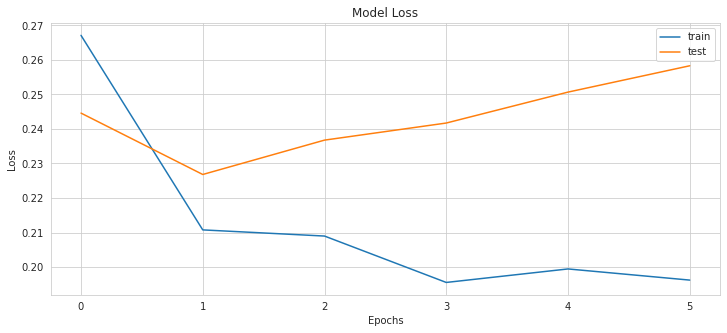

In [28]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

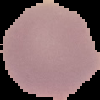

In [29]:
img = load_img('C1_thinF_IMG_20150604_104722_cell_73.png',target_size=(100,100))
img

In [30]:
img = img_to_array(img)

In [31]:
img.shape

(100, 100, 3)

In [32]:
img = img.reshape(1,100,100,3)

In [33]:
img.shape

(1, 100, 100, 3)

In [34]:
vgg_model.predict(img)

array([[1.]], dtype=float32)

In [35]:
tf.keras.models.save_model(vgg_model,'cells_malaria2.h5')

In [36]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(100, 100 ,3), include_top=False, weights="imagenet")

In [37]:
for layer in base_model.layers:
    layer.trainable = False

In [38]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)
#x = layers.Dense(16, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

res_net_model = tf.keras.models.Model(base_model.input, x)


res_net_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

__________________________________________________________________________________________________
conv4_block3_3_bn (BatchNormali (None, 7, 7, 1024)   4096        conv4_block3_3_conv[0][0]        
__________________________________________________________________________________________________
conv4_block3_add (Add)          (None, 7, 7, 1024)   0           conv4_block2_out[0][0]           
                                                                 conv4_block3_3_bn[0][0]          
__________________________________________________________________________________________________
conv4_block3_out (Activation)   (None, 7, 7, 1024)   0           conv4_block3_add[0][0]           
__________________________________________________________________________________________________
conv4_block4_1_conv (Conv2D)    (None, 7, 7, 256)    262400      conv4_block3_out[0][0]           
__________________________________________________________________________________________________
conv4_bloc

In [39]:
res_net_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [40]:
t1 = time.time()
history = res_net_model.fit_generator(train_data_gen, epochs=10, validation_data=val_data_gen)
t2 = time.time()

/home/subhash/miniconda3/envs/deepl/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


2022-07-13 11:34:31.303479: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-07-13 11:34:31.894256: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.41GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


689/689 [==============================] - ETA: 0s - loss: 0.6385 - accuracy: 0.6357

2022-07-13 11:39:53.165884: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-07-13 11:39:53.667480: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.30GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


689/689 [==============================] - 344s 468ms/step - loss: 0.6385 - accuracy: 0.6358 - val_loss: 0.5736 - val_accuracy: 0.6946
Epoch 2/10
689/689 [==============================] - 306s 444ms/step - loss: 0.5869 - accuracy: 0.6903 - val_loss: 0.5362 - val_accuracy: 0.7312
Epoch 3/10
689/689 [==============================] - 308s 447ms/step - loss: 0.5613 - accuracy: 0.7101 - val_loss: 0.4970 - val_accuracy: 0.7617
Epoch 4/10
689/689 [==============================] - 308s 446ms/step - loss: 0.5550 - accuracy: 0.7186 - val_loss: 0.4982 - val_accuracy: 0.7570
Epoch 5/10
689/689 [==============================] - 309s 448ms/step - loss: 0.5390 - accuracy: 0.7270 - val_loss: 0.5263 - val_accuracy: 0.7403
Epoch 6/10
689/689 [==============================] - 311s 451ms/step - loss: 0.5358 - accuracy: 0.7284 - val_loss: 0.5282 - val_accuracy: 0.7461
Epoch 7/10
689/689 [==============================] - 312s 453ms/step - loss: 0.5290 - accuracy: 0.7327 - val_loss: 0.5424 - val_accura

In [41]:
print('Time to train model:',round((t2-t1)/60, 2), 'minuts')
train_score = res_net_model.evaluate_generator(train_data_gen)
valid_score = res_net_model.evaluate_generator(val_data_gen)
print("Train_Accuracy = ", train_score[1])
print("Validation_Accuracy = ", valid_score[1])

Time to train model: 52.52 minuts


/home/subhash/miniconda3/envs/deepl/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Train_Accuracy =  0.7457819581031799
Validation_Accuracy =  0.7470054626464844


In [42]:
tf.keras.models.save_model(res_net_model,'cells_malaria1.h5')

In [43]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (100, 100, 3), include_top = False, weights = 'imagenet')

In [44]:
for layer in base_model.layers:
    layer.trainable = False

In [45]:
x = layers.Flatten()(base_model.output)
x = layers.BatchNormalization()(x)

x = layers.Dense(32, activation='relu')(x)

x = layers.Dense(1, activation='sigmoid')(x)

inception_model = tf.keras.models.Model(base_model.input, x)

In [46]:
inception_model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['accuracy'])

In [47]:
t1 = time.time()
history = inception_model.fit_generator(train_data_gen, epochs=20, validation_data=val_data_gen)
t2 = time.time()
print('Time to train model:',round((t2-t1)/60, 2), 'minuts')

Epoch 1/50


2022-07-13 12:32:06.484739: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.34GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-07-13 12:32:09.472118: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.56GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-07-13 12:32:09.911437: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.85GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-07-13 12:32:10.383313: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Alloc

689/689 [==============================] - ETA: 0s - loss: 0.4615 - accuracy: 0.7728

2022-07-13 12:35:39.206775: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.45GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-07-13 12:35:39.658206: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.73GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


689/689 [==============================] - 242s 305ms/step - loss: 0.4615 - accuracy: 0.7728 - val_loss: 0.3448 - val_accuracy: 0.8459
Epoch 2/50
689/689 [==============================] - 180s 261ms/step - loss: 0.3570 - accuracy: 0.8397 - val_loss: 0.3286 - val_accuracy: 0.8575
Epoch 3/50
689/689 [==============================] - 178s 258ms/step - loss: 0.3426 - accuracy: 0.8540 - val_loss: 0.3238 - val_accuracy: 0.8608
Epoch 4/50
689/689 [==============================] - 177s 256ms/step - loss: 0.3334 - accuracy: 0.8555 - val_loss: 0.3156 - val_accuracy: 0.8619
Epoch 5/50
689/689 [==============================] - 177s 257ms/step - loss: 0.3232 - accuracy: 0.8580 - val_loss: 0.3156 - val_accuracy: 0.8601
Epoch 6/50
689/689 [==============================] - 179s 259ms/step - loss: 0.3281 - accuracy: 0.8560 - val_loss: 0.3126 - val_accuracy: 0.8633
Epoch 7/50
689/689 [==============================] - 184s 267ms/step - loss: 0.3245 - accuracy: 0.8627 - val_loss: 0.3126 - val_accura

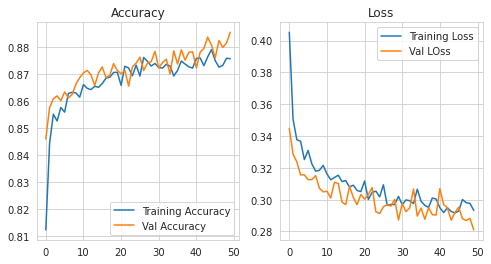

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(50)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()

In [49]:
tf.keras.models.save_model(inception_model,'cells_malaria.h5')

In [50]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)
if physical_devices:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [51]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [53]:
model = tf.keras.models.load_model('cells_malaria.h5') 

In [55]:
model2 = tf.keras.models.load_model('cells_malaria1.h5')

In [56]:
model3 = tf.keras.models.load_model('cells_malaria2.h5')

In [57]:
def model(img):
    
    vgg = vgg_model.predict(img)para
    
    resnet = res_net_model.predict(img)
    
    inception = inception_model.predict(img)
    
    return vgg, resnet, inception

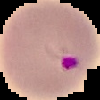

In [68]:
img = load_img('C33P1thinF_IMG_20150619_115740a_cell_162.png',target_size=(100,100))
img

In [69]:
img = img_to_array(img)

In [70]:
img.shape

(100, 100, 3)

In [71]:
img = img.reshape(1,100,100,3)

In [72]:
model(img)

(array([[0.]], dtype=float32),
 array([[1.]], dtype=float32),
 array([[1.]], dtype=float32))